In [7]:
import random as ran

import pandas as pd

import numpy as num

import plotly.express as px

import matplotlib.pyplot as plt


In [17]:
lines = ""

lines2 = ""

Words = []

Words2 = []

counter = 0

FilePath1 = "C:/Users/mbles/Desktop/Vaccines are Beneficial.txt"

FilePath2 = "C:/Users/mbles/Desktop/Resume.txt"

with open(FilePath1, "r", encoding = 'utf-8') as File:
    
    for line in File:

        for word in line.split():       
            Words.insert(counter, word)
            counter += 1

with open(FilePath1, "r", encoding = 'utf-8') as File:
    lines = File.read()
    
with open(FilePath2, "r", encoding = 'utf-8') as File:
    
    for line in File:

        for word in line.split():       
            Words.insert(counter, word)
            counter += 1

with open(FilePath2, "r", encoding = 'utf-8') as File:
    lines = File.read()


lines2 = lines2.lower()

non_letter_characters = ['[','@','_','!','#','$','%','^','&','*',
                      '(',')','<','>','?','/', '}','{','~',':',']',
                         ',','0', '1','2','3','4','5','6','7','8',
                         '9','\t','\n', ' ', '"', "'", '-','.',';',
                         '=','—','-','–','‘','“','”','\ufeff','…','’',
                         '\\\\', '\\', " \ ", ' n ', '  ','    ','   ',
                         '  n ']

for i in non_letter_characters:
    lines = lines.replace(i,' ')
    
for i in non_letter_characters:
    lines = lines2.replace(i,' ')
    

In [3]:
Alphabet_Upper = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
            'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 
            'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 
            'Y', 'Z']

Alphabet_Lower = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
                 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
                 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
                 'y', 'z']

LetterFrequencies = {}

for keys in lines:
    LetterFrequencies[keys] = LetterFrequencies.get(keys, 0) + 1
    
letter_keys = sorted(LetterFrequencies)


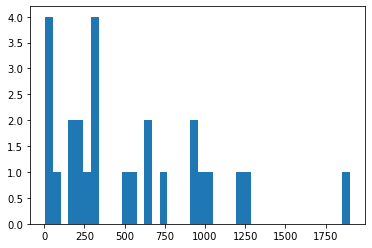

In [16]:
LetterFrequencies_df = pd.DataFrame(LetterFrequencies.items(), columns=['Letter', 'Frequency']) 

LetterFrequencies_df = LetterFrequencies_df.sort_values("Letter")

LetterFrequencies_df = LetterFrequencies_df[LetterFrequencies_df.Letter != " "]

#bar_graph = LetterFrequencies_df.plot.bar(x="Letter", y="Frequency", rot=70, title="Frequencies of Letters in Text")

histogram = plt.hist(LetterFrequencies_df["Frequency"], bins = 40)

plt.show()